In [1]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error

In [2]:
# Prepare data
def get_fib_seq(n, scale_data=True):
    # Get the Fibonacci sequence
    seq = np.zeros(n)
    fib_n1 = 0.0
    fib_n = 1.0 
    for i in range(n):
            #
            # Your code to create the fibonacci sequence. Store the sequence in an numpy array 'seq'
            #
            seq[i]=fib_n1 + fib_n
            fib_n1 = fib_n
            fib_n = seq[i]
            
    scaler = []
    if scale_data:
        scaler = MinMaxScaler(feature_range=(0, 1))
        seq = np.reshape(seq, (n, 1))
        seq = scaler.fit_transform(seq).flatten()        
    return seq, scaler


In [3]:
#
# Check if the function works correctly.
#
def get_fib_seq_check(n,scale_data=True):
    seq = np.zeros(n)
    fib_n1 = 0.0
    fib_n = 1.0 
    for i in range(n):
            #
            # Your code to create the fibonacci sequence. Store the sequence in an numpy array 'seq'
            #
            seq[i]=fib_n1 + fib_n
            fib_n1 = fib_n
            fib_n = seq[i]
            
    scaler = []
    if scale_data:
        scaler = MinMaxScaler(feature_range=(0, 1))
        seq = np.reshape(seq, (n, 1))
        seq = scaler.fit_transform(seq).flatten()        
    return seq, scaler,fib_n

In [4]:
n=4
dat,scaler,fib_N = get_fib_seq_check(n)
print('seq_normalised=',dat,'\n'
     'seq =',dat*(fib_N-1)+1)

seq_normalised= [0.   0.25 0.5  1.  ] 
seq = [1. 2. 3. 5.]


In [5]:
def get_fib_XY(total_fib_numbers, time_steps, train_percent, scale_data=True):
    dat, scaler = get_fib_seq(total_fib_numbers, scale_data) ## Loading the dataset.
    
    #
    #
    # Your code to create training and test dataset. 
    # Note - function argument total_fib_number is the total number of fibonacci numbers, 
    # time_step is the length of the input, 
    # and train_percent determines the ratio of train and test size 
    #   
    #
    Y_ind = np.arange(time_steps, len(dat),1)
    Y=dat[Y_ind]
    rows_x=len(Y)
    X=dat[0:rows_x]
    for i in range(time_steps-1):
        temp = dat[i+1:rows_x+i+1]
        X=np.column_stack((X,temp))
    rand = np.random.RandomState(seed=13)
    idx=rand.permutation(rows_x)
    split=int(train_percent*rows_x)
    train_ind = idx[0:split]
    test_ind = idx[split:]
    trainX=X[train_ind]
    trainY=Y[train_ind]
    testX=X[test_ind]
    testY=Y[test_ind]
    trainX = np.reshape(trainX,(len(trainX),time_steps,1))
    testX = np.reshape(testX,(len(testX),time_steps,1))
    

    return trainX, trainY, testX, testY, scaler


In [6]:
#
# Check if the function works correctly.
#
get_fib_XY(10,3,0.8)

(array([[[0.01136364],
         [0.02272727],
         [0.04545455]],
 
        [[0.04545455],
         [0.07954545],
         [0.13636364]],
 
        [[0.07954545],
         [0.13636364],
         [0.22727273]],
 
        [[0.13636364],
         [0.22727273],
         [0.375     ]],
 
        [[0.22727273],
         [0.375     ],
         [0.61363636]]]),
 array([0.07954545, 0.22727273, 0.375     , 0.61363636, 1.        ]),
 array([[[0.        ],
         [0.01136364],
         [0.02272727]],
 
        [[0.02272727],
         [0.04545455],
         [0.07954545]]]),
 array([0.04545455, 0.13636364]),
 MinMaxScaler())

In [7]:
# Set up parameters
time_steps = 20
hidden_units = 2
epochs = 30  # or epochs = 40 # if you use GPU or Google Colab

In [8]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mse', optimizer='adam')
    return model

In [9]:
model_RNN = create_RNN(hidden_units=hidden_units, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])

In [10]:
#
# Your code to print the model summary
#
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 8         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#
# Your code to get the dataset for the network - trainX, trainY, testX, testY, 
# using function get_fib_XY(1200, time_steps, 0.7)
#
trainX, trainY, testX, testY, scaler = get_fib_XY(1200, time_steps,0.7)

In [12]:
history = model_RNN.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=1)

Epoch 1/30

826/826 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 2/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0040
Epoch 3/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0037
Epoch 4/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0033
Epoch 5/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0030
Epoch 6/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 7/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 8/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0022
Epoch 9/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 10/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 11/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 12/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 13/30
826/826 [===

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')

C:\Users\mandh\AppData\Local\Temp\ipykernel_7480\1046343878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


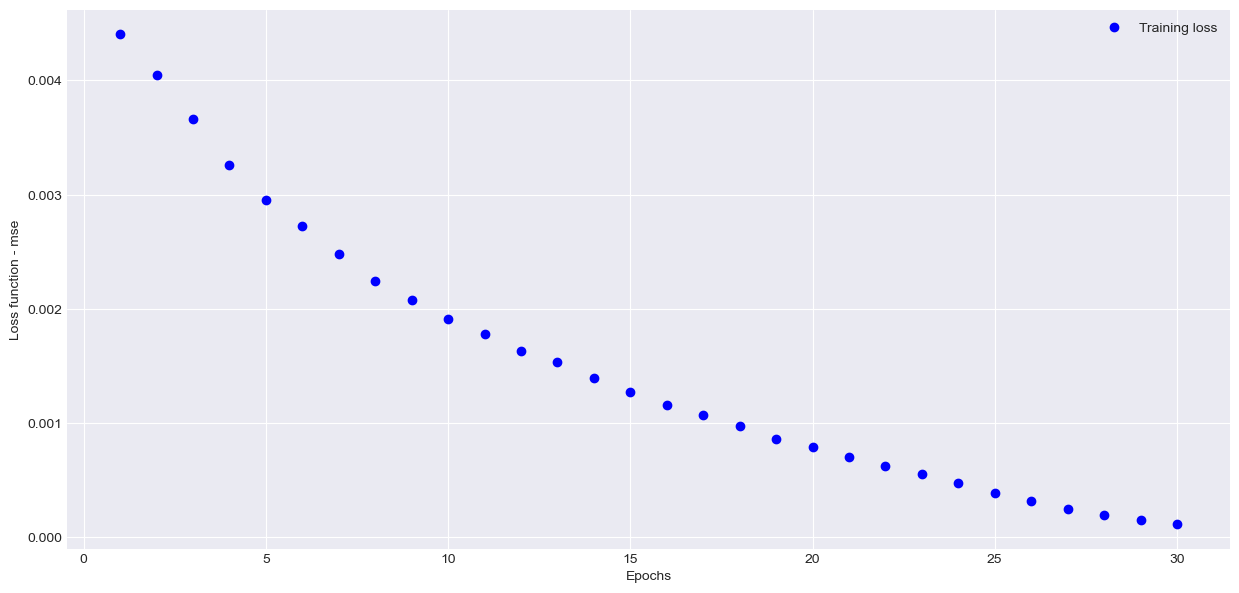

In [14]:
# Training chart

history_dict = history.history

losses = history_dict['loss']
Epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(Epochs, losses, 'bo', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - mse')
plt.legend()
plt.show()

In [26]:
# Evalute model
train_mse_RNN = model_RNN.evaluate(trainX, trainY)
test_mse_RNN = model_RNN.evaluate(testX, testY)

# Print train and test error metrics
print("Train set MSE = ", train_mse)
print("Test set MSE = ", test_mse)

12/12 [==============================] - 0s 1ms/step - loss: 1.4481e-05
Train set MSE =  0.0004215874650981277
Test set MSE =  0.00024231965653598309


In [27]:
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    

In [28]:
def create_RNN_with_attention(hidden_units, dense_units, input_shape, activation):
    x=Input(shape=input_shape)
    RNN_layer = SimpleRNN(hidden_units, return_sequences=True, activation=activation)(x)

    attention_layer = attention()(RNN_layer) ## Note = Attention layer is added here.

    outputs=Dense(dense_units, trainable=True, activation=activation)(attention_layer)
    model=Model(x,outputs)
    model.compile(loss='mse', optimizer='adam')    
    return model    

In [29]:
#
# Your code to create the model with attention. Use activation function 'tanh' and
# function 'create_RNN_with_attention'
#
model_attention = create_RNN_with_attention(hidden_units=hidden_units,dense_units=1,
                                            input_shape=(time_steps,1),activation='tanh')

In [30]:
#
# Your code to print the model summary
#
model_attention.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 20, 2)             8         
                                                                 
 attention_1 (attention)     (None, 2)                 22        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
#
# Your code to fit the model
# save the results of the training to 'history_2' variable list
# use batch_size=1
#
history2 = model_attention.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=1)

Epoch 1/30
826/826 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 2/30
826/826 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 3/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 4/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 5/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 6/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 7/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 8/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 9/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 10/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 11/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 12/30
826/826 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 13/30
826/826 [====

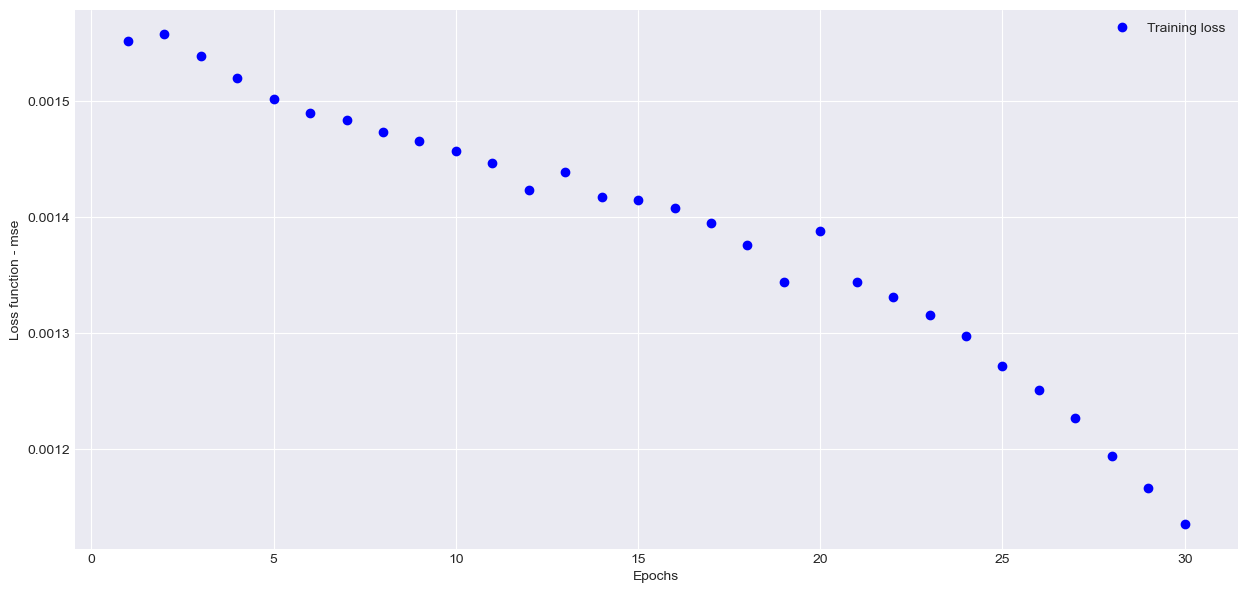

In [32]:
#
# your code to drow the Training chart
#
# Training chart

history_dict = history2.history

losses = history_dict['loss']
Epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(Epochs, losses, 'bo', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - mse')
plt.legend()
plt.show()

In [33]:
#
# your code to Evaluate attention model on training set
# Your code to evaluate the attention model on test set
#

train_mse_attention = model_attention.evaluate(trainX, trainY)
test_mse_attention = model_attention.evaluate(testX, testY)

# Print train and test error metrics
print("Train set MSE = ", train_mse)
print("Test set MSE = ", test_mse)

12/12 [==============================] - 0s 2ms/step - loss: 9.6200e-04
Train set MSE =  0.0004215874650981277
Test set MSE =  0.00024231965653598309


In [34]:
#
# your code to Evaluate attention model on training set
# Your code to evaluate the attention model on test set
#

train_mse = model_attention.evaluate(trainX, trainY)
test_mse = model_attention.evaluate(testX, testY)

# Print train and test error metrics
print("Train set MSE = ", train_mse)
print("Test set MSE = ", test_mse)

12/12 [==============================] - 0s 2ms/step - loss: 9.6200e-04
Train set MSE =  0.0010830983519554138
Test set MSE =  0.0009620002820156515


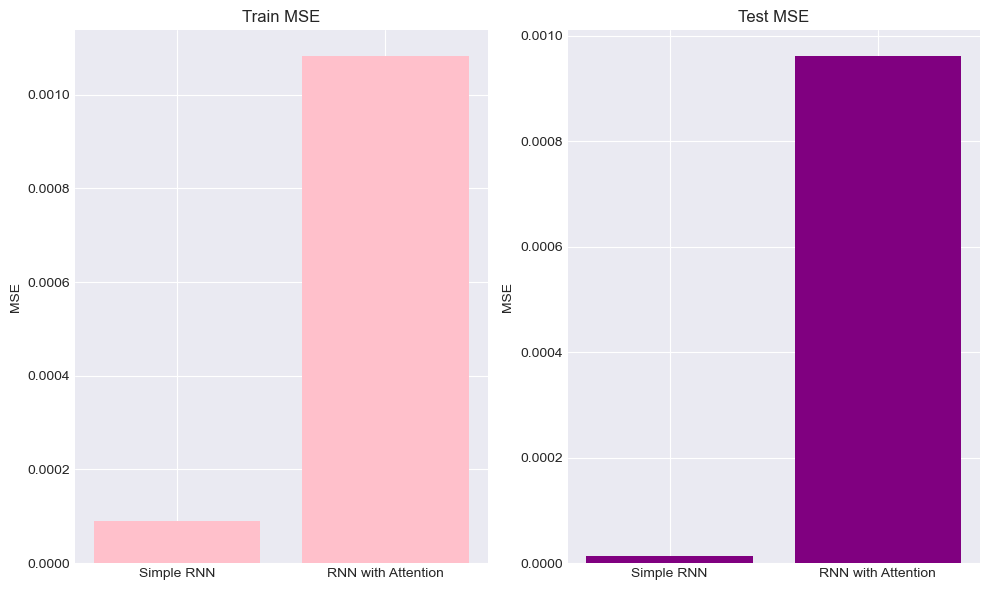

In [37]:
import matplotlib.pyplot as plt

# Define the model names
model_names = ['Simple RNN', 'RNN with Attention']

# Define the train and test MSE values for both models
train_mse_values = [train_mse_RNN, train_mse_attention]
test_mse_values = [test_mse_RNN, test_mse_attention]

# Plot the train and test MSE for both models
plt.figure(figsize=(10, 6))

# Plot train MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, train_mse_values, color='pink')
plt.title('Train MSE')
plt.ylabel('MSE')

# Plot test MSE
plt.subplot(1, 2, 2)
plt.bar(model_names, test_mse_values, color='purple')
plt.title('Test MSE')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()